# 3. Segmentación de clientes

Se revisan técnicas poderosas en marketing: la segmentación de clientes. Se comienza por comprender la necesidad de la segmentación de clientes, después se implementa un enfoque de ML para segmentación. Se utiliza el algoritmo de agrupación clúster k-means para segmentar a los clientes y luego analiza los segmentos obtenidos para obtener una comprensión de los resultados para que las empresas puedan actuar sobre ellos.

# 3.1. Introducción


- Campañas de marketing sean más **efectivas**.
- Comprensión profunda de los clientes y sus necesidades.
- Abstracción de millones de clientes a unos pocos segmentos.
- Impacto comercial significativo (mensajes más dirigidos y específicos).

El director de marketing de una empresa de comercio electrónico con una base de 1 millón de clientes que realizan transacciones. Desea que las campañas de marketing sean más **efectivas**, llegando al cliente correcto con el mensaje correcto. 

Al comprender mejor al cliente y sus necesidades, las campañas de marketing pueden proporcionar un **impulso** significativo al negocio. A medida que comenzamos a resolver este problema, se piensa en la **experiencia del cliente**. Un cliente promedio recibe varios mensajes sobre las últimas ofertas. Estos se envían por correo electrónico, notificaciones automáticas y campañas en las redes sociales. Esta puede no ser una gran experiencia para ellos, especialmente si estas comunicaciones son **campañas genéricas/masivas.** Si la empresa entendiera mejor las necesidades de los clientes y les enviara el contenido relevante, comprarían con mucha más frecuencia.

Varios ejemplos como este muestran que una comprensión profunda de los clientes y sus necesidades es beneficiosa no solo para la empresa sino también para el cliente. Si tiene una empresa pequeña, comprender las necesidades de todos los clientes es tan fácil como realizar una **encuesta rápida**. Sin embargo, para una empresa con una gran base de usuarios con millones de clientes, comprender sus necesidades sería extremadamente difícil, dado que cada cliente tendrá sus propios gustos y necesidades diferentes. **Además, con clientes de diferentes orígenes, culturas y grupos de edad, este problema se vuelve aún más difícil de resolver**.

Seguramente las cosas serían más fáciles si pudiéramos simplificar esta tarea y condensar a los clientes en unos pocos grupos. En lugar de tratar con un millón de clientes, ¿no sería más fácil tratar con, digamos, cinco tipos de clientes? **La segmentación de clientes le permite hacer exactamente eso: abstraiga potencialmente a millones de clientes a unos pocos segmentos y comprenda sus características y necesidades**. Con este conocimiento, el impacto te puedes tener es mayor.

Puede enviar mensajes más dirigidos y específicos a través de campañas de marketing, ofrecer servicios diferenciales, hacer mejores recomendaciones de productos y más para mejorar la experiencia general del cliente; todo esto conduce a un impacto comercial significativo, no solo un impacto inmediato en los ingresos a través de campañas de marketing más eficientes, sino también un impacto positivo significativo en el valor a largo plazo que los clientes aportan a la plataforma.

En esta sección se comprenderá qué es la segmentación de clientes, cómo se usa y cómo usar ML para crear sus propios modelos de segmentación de clientes en Python.


In [ ]:
#  http://tech.nitoyon.com/en/blog/2013/11/07/k-means/
#  http://nl-hugo.github.io/d3-kmeans/index.html

from IPython.display import IFrame
IFrame("https://nl-hugo.github.io/d3-kmeans/index.html", width=800, height=400)


# 2. Segmentación

La segmentación, en pocas palabras, significa agrupar entidades similares. Las entidades de cada grupo son similares entre sí, es decir, "los grupos son homogéneos", lo que significa que las entidades tienen propiedades similares.

**¿Qué entidades se pueden segmentar?** 
- Puedes segmentar clientes, 
- productos, 
- ofertas, 
- vehículos, 
- frutas, 
- animales, 
- países o incluso estrellas. 

Si puede expresar, a través de datos, las propiedades de la entidad, puede comparar esa entidad con otras entidades y segmentarla.

Pasando al segundo aspecto clave, ¿de qué propiedades estamos hablando? Estamos hablando de propiedades relevantes para el ejercicio de agrupación. 

**Supongamos que está tratando de agrupar a los clientes en función de la frecuencia de compra de un producto.** En tales casos, es posible que datos como el género de los clientes, aunque estén fácilmente disponibles para usted, no ser relevante para su análisis. 

Es por eso que elegir los atributos relevantes es fundamental. Discutiremos este aspecto con más detalle más adelante en este capítulo, en la sección Elección de atributos **relevantes criterios de segmentación**.



Un ejercicio general de segmentación de clientes implica los siguientes pasos clave:

1.	Selección de los atributos relevantes para las entidades
2.	Agrupación entidades
3.	Comprender y describir los segmentos

En el último paso los segmentos resultantes deben tener sentido para el negocio y ser accionables. Las partes interesadas del negocio, que desempeñan el papel fundamental del "Know-how", deben poder comprender estos segmentos con claridad. 

Posteriormente estos segmentos se pueden refinar, haciéndolos aún más prácticos e impulsados por el negocio. El equipo de marketing puede entenderlos fácilmente y aprovecharlos para crear una campaña de marketing exitosa. Por eso, describir los segmentos obtenidos de forma que el negocio los entienda es un paso necesario.


## Ejercicio 3.01: Segmentación de clientes de centros comerciales: comprensión de los datos

Eres analista en una empresa de consultoría líder y entre tus clientes más nuevos se incluye una popular cadena de centros comerciales repartidos por muchos países. El centro comercial quiere obtener una mejor comprensión de sus clientes para rediseñar sus ofertas existentes y comunicaciones de marketing para mejorar las ventas en un área geográfica. Los datos sobre los clientes están disponibles en el archivo mall_Customers.csv.

1. Importe numpy, pandas y pyplot desde matplotlib y seaborn usando el siguiente código:

In [19]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

2. Usando el método read_csv de pandas, importe el archivo Mall_Customers.csv en un DataFrame de pandas llamado data0 e imprima las primeras cinco filas:

In [20]:
!curl https://raw.githubusercontent.com/limspiga/customer-analytics/main/week-2a/datasets/Mall_Customers.csv -O

data0 = pd.read_csv("Mall_Customers.csv")
data0.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3780  100  3780    0     0  46097      0 --:--:-- --:--:-- --:--:-- 46097


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Vemos que tenemos información como el genero y la edad de los clientes, junto con su ingreso anual estimado (**Ingreso Anual (k$)**). También tenemos un puntaje de gasto calculado por el centro comercial **(Puntuación de gasto (1-100)**), que indica la cantidad de compras que el cliente ha realizado en el centro comercial: un puntaje más alto significa un gasto mayor.

Use el método info() del DataFrame para imprimir información al respecto:

In [21]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Se puede observar que el conjunto de datos contiene los datos de 200 clientes. También puede ver que no faltan valores en el conjunto.

4. Por conveniencia, cambie el nombre de Ingreso Anual (k$) y
Spending Score (1-100) columnas a Income y Spend_score respectivamente, e imprima los cinco registros principales usando el siguiente código:

In [22]:
data0.rename({'Annual Income (k$)':'Income', \
              'Spending Score (1-100)':'Spend_score'}, axis=1, \
             inplace=True)
data0.head()

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


5. Para obtener una comprensión de alto nivel de los datos del cliente, imprima el resumen descriptivo de los campos numéricos en los datos utilizando el método describe de DataFrame

In [23]:
data0.describe().round(0)

,CustomerID,Age,Income,Spend_score
count,200.0,200.0,200.0,200.0
mean,100.0,39.0,61.0,50.0
std,58.0,14.0,26.0,26.0
min,1.0,18.0,15.0,1.0
25%,51.0,29.0,42.0,35.0
50%,100.0,36.0,62.0,50.0
75%,150.0,49.0,78.0,73.0
max,200.0,70.0,137.0,99.0


Figura 3.4: Resumen descriptivo del conjunto de datos

Los promedios generales muestran que la edad promedio del cliente es de alrededor de **39 años** y el ingreso promedio es de alrededor de **61,000 USD**. Los puntajes de gasto parecen calcularse en base a percentiles, con un **valor mínimo de 1 y un máximo de 99**, lo cual es común con los percentiles (los puntajes de 0 a 1 también son comunes para los percentiles). El ingreso máximo ronda los **137.000 USD**. Al observar estos valores, no sospechamos ningún valor atípico en los datos. Esto completa una comprensión de muy alto nivel de los datos.

# 3.1 Enfoques de la segmentación

Cada grupo de marketing hace, en efecto, cierta cantidad de segmentación de clientes. Sin embargo, los métodos que utilizan para hacer esto pueden no ser siempre claros. Estos pueden basarse en **intuiciones sobre ciertos grupos demográficos**, o pueden ser el resultado de algún **software de marketing**, donde los métodos utilizados son oscuros. 

Hay ventajas y desventajas para cada método posible y comprenderlas le permite utilizar la herramienta adecuada para el trabajo. En las siguientes secciones, analizaremos algunos de los **enfoques** más utilizados para la segmentación de clientes junto con las consideraciones al usar dichos enfoques.

# 3.1.1 Métodos de segmentación tradicionales
Un método preferido por los analistas de marketing consiste en generar **agrupaciones** aproximadas basadas en:
- **intuiciones y umbrales arbitrarios**.

Para ello, aprovechan todos los datos sobre los clientes que tienen a su disposición, normalmente demográficos o de comportamiento. Un ejemplo de esto sería decidir segmentar a los clientes en diferentes niveles de ingresos en función de incrementos de $10,000. Otro enfoque podría ser observar cómo se distribuyen los valores de los atributos y buscar umbrales naturales a partir de los datos.

## Ejercicio 3.02: Segmentación Tradicional de Clientes de Centros Comerciales

El centro comercial quiere segmentar sus clientes y usar los segmentos derivados para mejorar sus campañas de marketing. 

El equipo comercial **cree** que es relevantela para sus ofertas segmentación en función a los:
- **niveles de ingresos** 

Se le pide que utilice un enfoque tradicional basado en reglas para definir los segmentos de clientes.


En este ejercicio se hace una segmentación de clientes utilizando los **ingresos del cliente**, con un enfoque tradicional basado en **reglas** para definir segmentos de clientes. Graficar la distribución de la variable Ingresos y asignará grupos a los clientes en función de dónde vea que se encuentran los valores:

1. Graficar un histograma de la columna Income usando el método de grafica de DataFrame

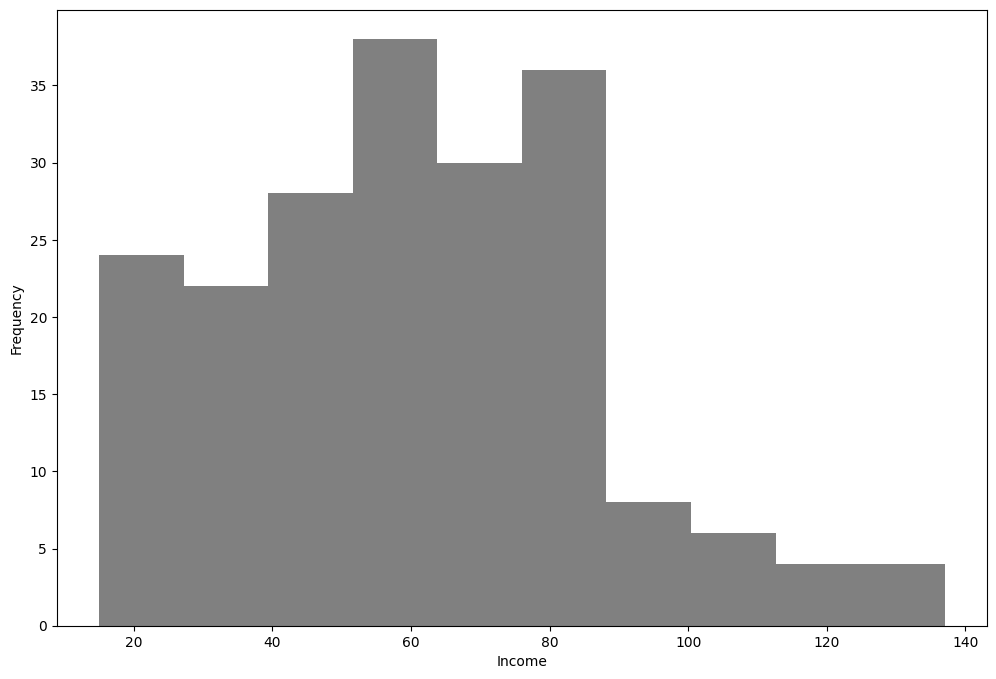

In [24]:
data0.Income.plot.hist(color='gray', figsize=(12,8)) 
plt.xlabel('Income')
plt.show()

Más allá de 90k, la frecuencia en los contenedores cae drásticamente y parece que estos clientes, naturalmente, pueden considerarse un grupo separado que representa a los clientes de altos ingresos. Una buena proporción de clientes parece estar en el rango de 50k-90k. Estos pueden ser considerados clientes de ingresos moderados. Los clientes que ganan menos de 40k serían clientes de bajos ingresos. Podemos usar estos puntos de corte para dividir a los clientes en tres grupos, como en la siguiente figura. Los segmentos punteados denotan los cortes/umbrales.



<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1SNXe-H0eZP5WtwU0nDlunzZ1IvSPxxlN' width="800" />
<figcaption>Figura 3.6: Segmentación de los clientes en función de los ingresos</figcaption></center>
</figure>


2. Cree una nueva columna, Cluster, para tener los ingresos bajos,
Valores de ingresos moderados y ingresos altos para clientes con ingresos en los rangos < 50, 50–90 y >= 90 respectivamente

In [25]:
data0['Cluster'] = np.where(data0.Income >= 90, 'High earners', \
                            np.where(data0.Income < 50, \
                            'Low Income', 'Moderate Income'))

3. Para verificar la cantidad de clientes en cada grupo y confirmar si los valores de la columna Ingresos en los grupos están en el rango correcto, obtenga un resumen descriptivo de Ingresos para estos grupos

In [26]:
 data0.groupby('Cluster')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
High earners,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
Low Income,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
Moderate Income,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0


Los valores máximo y mínimo para cada clúster confirman que los clústeres se han definido como pretendíamos. La mayoría de los clientes se encuentran en el grupo de ingresos moderados. También puede ver que solo 22 clientes están marcados como
altos ingresos

Este tipo de métodos tienen la ventaja de ser simples y fáciles de entender. 

Sin embargo, la segmentación con enfoques tradicionales se vuelve mucho más compleja cuando se **agregan más variables**, como la edad, el género, otra información demográfica relevante u otros atributos relevantes identificados por la empresa. 

A medida que aumenta el número de variables, se vuelve difícil elegir **umbrales** de manera que no termine con grupos con muy pocos clientes en ellos. 

Por ejemplo, ¿cuántas personas habría en el grupo de 18 a 25 años que ganan $100,000 o más?

Esto se vuelve más importante cuando se observan los datos de comportamiento de los clientes. La creación de grupos basados ​​en la intuición puede dar lugar a que se pasen por alto **patrones** subyacentes en los datos. 
Por ejemplo, si puede haber segmentos de la población que respondan bien a tipos muy específicos de ofertas de marketing. 

Si el analista que realiza la segmentación no conoce este grupo específico y los tipos de anuncios a los que responden los clientes del grupo, es posible que no pueda capturarlos como un grupo único. Por ejemplo, un analista de marketing que separa a los clientes en aquellos que responden a ofertas de productos costosos y aquellos que responden a ofertas de productos económicos podría pasar por alto un grupo de clientes que solo están interesados ​​en productos electrónicos, independientemente de si son caros o económicos.

# 3.2 Aprendizaje no supervisado (Clustering) para la segmentación de clientes
Esta  es una técnica que tiende a **recoger** en patrones los datos que de otro modo podrían perderse. Es clave para la segmentación de clientes porque encuentra los puntos de datos que más **se parecen y los agrupa**, que es lo que debe hacer una buenas técnicas de segmentación de clientes.

La agrupación en clústeres es un tipo de técnica de aprendizaje automático no supervisado que busca en clusterings de datos **sin conocerlos de antemano**. 

Ventajas del uso de clústeres para la segmentación de clientes:

- Pueden encontrar grupos de clientes inesperados o desconocidos para el analista.
- Flexibles y se puede utilizar para una amplia gama de datos.
- Reduce la necesidad de conocimientos especificos sobre las relaciones entre la demografía de los clientes y sus comportamientos.
- Rápido de realizar y escalable a conjuntos de datos grandes.

Desventajas de la agrupación:
- Los grupos de clientes creados pueden no ser **fáciles de interpretar**.

Una desventaja de la agrupación en clústeres es que puede encontrar grupos que no parecen tener mucho sentido en la superficie. A menudo, esto se puede solucionar mediante el uso de un algoritmo de agrupación en clústeres más adecuado. 

# 3.2.1 Elección de atributos relevantes (criterios de segmentación)
Para usar el agrupamiento para la segmentación de clientes (para agrupar clientes con otros clientes que tienen características similares), primero debe decidir qué significa **similar**, o en otras palabras, debe ser preciso al definir qué tipos de clientes son similares. La elección de las propiedades que intervienen en el proceso de segmentación es una decisión extremadamente importante, ya que define cómo se representan las entidades y dirige la naturaleza de los grupos formados.

Digamos que deseamos segmentar a los clientes únicamente por su frecuencia de compra y valor de transacción. **En tal situación, los atributos como la edad, el sexo u otros datos demográficos no serían relevantes**. 
Por otro lado, si la intención es segmentar a los clientes puramente demográficamente, su **frecuencia de compra** y **valor de transacción** serían los atributos que no serían relevantes para nosotros.

Un buen criterio para la segmentación podría ser el compromiso del cliente, que incluye características como: 
- Tiempo que pasa en el sitio.
- Visitas a la plataforma en un período de tiempo definido.
- Páginas vistas en un sitio web
- Días desde el último inicio de sesión, entre otros.

\* Estructura (representación)

Al trabajar con un conjunto de datos que involucra este tipo de información, necesitamos almacenar los datos de cada entidad, por ejemplo: un cliente, en una fila. Los valores para cada fila en los datos serían representativos de un cliente, de manera más general, de cada entidad de interés. 

Este tipo de representación ayuda a **comparar** una entidad con otras entidades en el conjunto de datos.

Para este caso de estudio, decidamos los criterios de segmentación. Independientemente de la edad, digamos que deseamos separar a los clientes en función de:

- Nivel de ingresos 
- Puntajes de gastos 

Al utilizarlos, podríamos tener una estrategia de marketing (2) diferencial para los clientes que tienen, por ejemplo:
- Ingresos altos y puntajes de gastos bajos... frente a aquellos con
- Ingresos bajos y puntajes de gastos altos. 

Con los criterios de segmentación decididos (atributos relevantes elegidos), comprendamos algunos conceptos clave que permiten el proceso de agrupación.

# 3.2.2 Estandarización de datos
Para poder agrupar a los clientes en función de **variables continuas,** primero debemos **escalar** los parámetros para que los datos estén en escalas similares. Por ejemplo la edad e ingresos están en escalas muy diferentes. 

Es común ver ingresos anuales de dos personas que difieren 
en \$ 10,000 pero sería muy extraño ver que sus edades difieren en 10,000 años. 

Por lo tanto, necesitamos controlar mejor cómo el cambio en una variable afecta la similitud general entre los clientes. Por ejemplo, podemos requerir que una diferencia de edad de 10 años entre dos clientes sea tratada como equivalente a una diferencia de ingresos de $10,000. Sin embargo, hacer este tipo de determinaciones manualmente para cada variable es difícil. Esta es la razón por la que normalmente **estandarizamos los datos**, para ponerlos todos en una **escala estándar**.

La escala tiene un impacto significativo en la similitud percibida entre las entidades. Para comprender el impacto de la escala y las unidades de medida de una manera simple y visual, considere los tres gráficos de la Figura 3.9. Los gráficos representan datos de cuatro clientes (C1, C2, C3, C4). Los datos originales están en la siguiente tabla, donde se tiene la edad del cliente en años y el ingreso anual en 000's INR (Rupia Nacional India):


<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1vrjHFF7Nt7CdjFu7B87n2UfaxCsHXxp4' width="800" />
<figcaption>Figura 3.8: Datos de cuatro clientes</figcaption></center>
</figure>



Si graficamos los clientes como puntos en un diagrama de dispersión con Age en el eje x e Income en el eje y, vemos que los ingresos de los clientes C3 y C4 están muy cerca uno del otro y que los ingresos de los clientes C1 y C2 forman un par. Pero, ¿y si convertimos el ingreso anual a USD (dividiendo por 70 por simplicidad)? Observemos en el gráfico del medio en la Figura 3.9. 

Ahora se forman C1 y C3 un par, con C2 y C4 formando otro. Los clústeres cambiaron drásticamente al cambiar las unidades de medida (INR a USD):

<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1iKqiY1zrMkA3Dfy8x7CPOZgVh7UXvkZc' width="800" />
<figcaption>Figura 3.9: Representación de los clientes como puntos en un diagrama de dispersión</figcaption></center>
</figure>



Una estrategia natural para manejar este problema es ***estandarizar*** los datos, es decir, obtener
los valores a una escala similar y comparable. Una de esas estrategias se aplicó a los datos de los cuatro clientes anteriores, lo que resultó en la gráfica más a la derecha en la Figura 3.9. De hecho, es interesante notar que después de la estandarización, ninguno de los puntos parece estar formando grupos naturales con otro. **Este ejemplo ilustra la importancia de la estandarización y cómo, de lo contrario, podemos ser engañados haciéndonos creer que existen grupos naturales cuando no los hay.**

Existen varias formas de estandarizar o cambiar la escala de las características, una forma popular que se emplea para la agrupación en clústeres es el ***escalado estándar***, es decir, para calcular su puntuación $z$. Esto se hace en dos pasos, para cada columna:


1. **Restar** la media de los datos de cada punto de datos. Así centra los datos alrededor de 0 (para que los datos sean más fáciles de ver e interpretar).


2. **Dividir** los parámetros por su desviación estándar.

La desviación estándar es una medida de **cuán dispersos están nuestros puntos.** Se calcula comparando el promedio de los datos con cada punto de datos. Los datos como los ingresos, donde los puntos se pueden distribuir por muchos miles, tendrán desviaciones estándar mucho mayores que los datos como la edad, donde las diferencias entre los puntos de datos tienden a ser mucho menores. La siguiente fórmula se utiliza para calcular el valor estandarizado de un punto de datos:

<h1><center>

$ Z_{i} = \frac{x_{i} - mean(x)}{std(x)}$

Formula 3.10: La ecuación de estandarización
</center></h1>

In [27]:
# https://www.youtube.com/watch?v=0-k4r87ozFo
import pandas as pd
years = pd.DataFrame([1,4,24,26,70])
# print(years.mean())
print(years.std()) # dispersos están nuestros puntos

0    27.586228
dtype: float64


Aquí, $Z_{i}$ corresponde al ${i}$-ésimo valor estandarizado, ${x}$ representa todos los valores, $mean(x)$ es el valor medio de todos los valores de $x$ y $std(x)$ es la desviación estándar de los valores de $x$.

En este ejemplo: 

(1) Al dividir todos los valores de Age por la desviación estándar de las Edades, transformamos los datos de modo que la desviación estándar sea igual a 1. 

(2) Cuando hacemos lo mismo con los ingresos, la desviación estándar de los ingresos será también será igual a 1. 

Por lo tanto, una diferencia de 1 entre dos clientes en cualquiera de estas medidas indicaría un nivel similar de diferencia entre ellos. Esto asegura que todas las características tengan una influencia similar en la formación de los clústeres.

¿Hay algún inconveniente en este enfoque? 

Piense en la facilidad de interpretación de estos valores. Todos tenemos una idea intuitiva de lo que significan \$10,000 o 10 años, pero es más **difícil** pensar en lo que significa el valor de una desviación estándar de ingresos. Sin embargo, esto no importa para el algoritmo de aprendizaje automático, ya que no tiene la misma **comprensión intuitiva** de los datos que nosotros.

Para la implementación de la estandarización de datos, se usa la funcion *StandardScaler* de [scikit-learn](https://scikit-learn.org/stable).

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

La funcion StandardScaler tiene función para ajustarse al conjunto de datos determinado. La función calcula la media y la desviación estándar para cada una de las columnas. 


In [ ]:
# calcula la media y la desviación estándar para cada una de las columnas
# scaler.fit_transform (data_orig[cols])

El código anterior ajusta, transforma y devuelve los datos escalados. La variable cols puede ser una lista de columnas para escalar en el conjunto de datos data_orig.

# Ejercicio 3.03: Estandarización de datos de clientes

Estandarizar los datos de los clientes de un centro comercial mediante la función $Z$, uando **StandardScaler** de scikit-learn. 

1. Importar el método StandardScaler de sklearn y crear una instancia de StandardScaler

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


2. Crear una lista llamada cols_to_scale para guardar los nombres de las columnas a escalar, Age, Income y Spend_score. Además, hacer una copia del DataFrame (para conservar los valores originales) y asígnele el nombre data_scaled.

In [30]:
!curl https://raw.githubusercontent.com/limspiga/customer-analytics/main/week-2a/datasets/Mall_Customers.csv -O
data0 = pd.read_csv("Mall_Customers.csv")
cols_to_scale = ['Age', 'Income', 'Spend_score']

data_scaled = data0.copy()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3780  100  3780    0     0  44470      0 --:--:-- --:--:-- --:--:-- 44470


3. Utilizando el método fit_transform del escalador, aplique la transformación a las columnas elegidas:


In [35]:
# fix
# data0.rename({'Annual Income (k$)':'Income', \
#               'Spending Score (1-100)':'Spend_score'}, axis=1, \
#              inplace=True)

data_scaled[cols_to_scale] = scaler.fit_transform(data0[cols_to_scale])


4. Verificar lo anterior con un Describe() en las columnas modificadas.

In [39]:
# data_scaled[cols_to_scale].describe()
data_scaled[cols_to_scale].describe().round()

,Age,Income,Spend_score
count,200.0,200.0,200.0
mean,-0.0,-0.0,-0.0
std,1.0,1.0,1.0
min,-1.0,-2.0,-2.0
25%,-1.0,-1.0,-1.0
50%,-0.0,0.0,-0.0
75%,1.0,1.0,1.0
max,2.0,3.0,2.0


Figura 3.11: Resumen descriptivo de las columnas modificadas


El valor medio de todas las columnas es prácticamente 0 y la desviación estándar de todas es 1. **Esto confirma que la estandarización ha funcionado.** 
Compare esto con la tabla de la 
[Figura 3.4](#figure_3_4)
para ver que el valor medio y la desviación estándar para cada columna se han estandarizado. Esto garantiza que todas las columnas tengan el mismo peso al calcular la similitud o la distancia entre los clientes.

# 3.2.3 Cálculo de la distancia

Otra forma alternativa de agrupar es calcular la **disimilitud** entre entidades. De esta manera, podemos entender cuán diferentes (o alejadas) son las entidades. 

La distancia geométrica entre entidades en el espacio de características es una forma natural de medir la disimilitud. En un diagrama de dispersión bidimensional, la distancia euclidiana entre dos clientes es solo la distancia entre sus puntos, como puede ver en la Figura 3.12:

<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1aO9Ek6JzDPdcSOL3XlTU1Nhpgv0AwgNo' width="800" />
<figcaption>Figura 3.12: Distancia euclidiana entre dos puntos en el plano XY</figcaption></center>
</figure>

En el gráfico anterior, la longitud de la línea es la distancia euclidiana entre los dos puntos. Cuanto mayor es esta distancia, menos similares son los clientes. Si bien esto es más fácil de pensar y visualizar en dos dimensiones, las matemáticas para calcular la distancia euclidiana se aplican igual de bien a múltiples dimensiones.

Para dos puntos de datos, $p$ y $q$, la distancia entre ellos se calcula de la siguiente manera:
<h1><center>
$ d\left( p,q\right)   = \sqrt {\sum  \left( p_{i}-q_{i}\right)^2 } $

Figura 3.13: Ecuación para calcular la distancia euclidiana entre dos puntos
</center><h1>



Aquí, $p = (p1+p2+...pn)$, $q = (q1+q2+...qn)$, y $n$ es el número de características. Por lo tanto, podemos encontrar la distancia entre los clientes independientemente de cuántas características/dimensiones queramos usar. 

Para la implementación de Python, usaremos la utilidad **cdist** en [SciPy](https://scipy.org).

In [ ]:
from scipy.spatial.distance import cdist

# array1 = [[1,1],[1,3]]
# array2 = [[1,1],[1,3]]

cdist(array1, array2, metric='euclidean')

array([[0., 2.],
       [2., 0.]])

En el comando anterior, array1 es la primera matriz de datos. Podría representar datos para un cliente o muchos (arreglo bidimensional). array2 es la otra matriz. La distancia se calcula entre las entidades de matriz1 y las de matriz2. Al especificar la métrica como euclidiana, se calcula la distancia euclidiana entre las entidades array1 y array2.

Calcular la distancia entre puntos es un paso clave en la agrupación.

# Ejercicio 3.04: Cálculo de la Distancia entre Clientes
En este ejercicio, calculará la distancia euclidiana entre tres clientes. El objetivo del ejercicio es poder calcular la similitud entre los clientes.

1. Estandarizar los campos Income y Spend_score para los primeros tres clientes como se muestra en la siguiente tabla (Figura 3.14)
2. Calcular la distancia usando el método cdist de scipy.

1. Del dataset (data_scaled creado en el Ejercicio 3.03, Estandarización de datos de clientes), extraer los tres primeros registros con los campos Income y Spend_score en un conjunto de datos llamado cust3 e imprima el conjunto de datos

In [40]:
sel_cols = ['Income', 'Spend_score']
cust3 = data_scaled[sel_cols].head(3)
cust3

,Income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


Puede observar  los tres primeros registros. En este ejercicio se calculará la distancia entre estos tres clientes.
2. Usar el método cdist desde scipy.spatial.distance

In [41]:
from scipy.spatial.distance import cdist

3. La función cdist se puede usar para calcular la distancia entre cada par de las dos colecciones de entradas. Para calcular la distancia entre los clientes en cust3, proporcione el conjunto de datos cust3 como entradas de datos para cdist, especificando euclidiana como la métrica.

In [42]:
cdist(cust3, cust3, metric='euclidean')

array([[0.        , 1.63050555, 1.28167999],
       [1.63050555, 0.        , 2.91186723],
       [1.28167999, 2.91186723, 0.        ]])

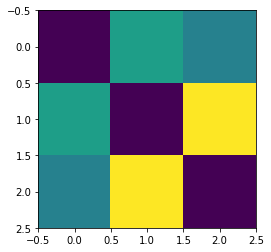

In [ ]:
# DistMatrix = cdist(cust3, cust3, metric='euclidean')
# import matplotlib.pyplot as plt
# plt.imshow(DistMatrix, interpolation='none')
# plt.show()

Debería obtener el siguiente resultado, una cuadrícula bidimensional de distancias entre cada par de clientes:

El resultado muestra que la distancia entre el primer y el segundo cliente es de 1,63 unidades, mientras que la distancia entre el primer y el tercer cliente es de 1,28 unidades. La distancia entre el segundo y el tercer cliente es de 2,92 unidades.

4. Verifique que 1,6305 sea efectivamente la distancia euclidiana entre el cliente 1 y el cliente 2, calculándola manualmente con el siguiente código:

In [ ]:
np.sqrt((-1.739+1.739)**2 + (-0.4348-1.1957)**2)

1.6305

El resultado es 1.6305. Esto coincide exactamente con la distancia calculada por el método cdist.

En este ejercicio, calculó la distancia entre tres puntos utilizando el paquete cdist. Note que:
- puntos con valores que son similares tienen distancias más bajas. 

Dicho cálculo de distancia es un paso clave para determinar la similitud entre entidades y lo utilizan los algoritmos de aprendizaje automático para la agrupación.

# 3.3. K-Means Clustering
K-Means Clustering es una técnica de aprendizaje no supervisado muy común con una amplia gama de aplicaciones. Es poderoso porque es conceptualmente relativamente simple, se escala a conjuntos de datos muy grandes y tiende a funcionar bien en la práctica. 

K-means clustering es un algoritmo que permite encontrar la mejor manera de agrupar puntos de datos en k grupos diferentes, donde **k es un parámetro dado al algoritmo**. Por ahora, elegiremos k arbitrariamente. Luego, el algoritmo funciona iterativamente para tratar de encontrar la mejor agrupación. Hay dos pasos para este algoritmo:

1. El algoritmo comienza seleccionando aleatoriamente LOS puntos K en el espacio para que sean los centroides de los cluters. Luego, cada punto de datos se asigna al centroide más cercano.

2. Los centroides se actualizan para que sean la media de todos los puntos de datos que se les asignan. Luego, los puntos de datos se reasignan al centroide más cercano a ellos.

El paso 2 se repite hasta que ninguno de los puntos de datos cambia el centroide al que están asignados después de actualizar el centroide.

El **algoritmo no es determinista**, es decir, **el resultado del algoritmo depende de las ubicaciones iniciales de los centroides**.

Por lo tanto, no siempre se garantiza encontrar la mejor agrupación. Sin embargo, en la práctica, tiende a encontrar buenas agrupaciones sin dejar de ser computacionalmente económico incluso para grandes conjuntos de datos. El agrupamiento de K-means es rápido y fácilmente escalable y, por lo tanto, es el algoritmo de agrupamiento más común utilizado.

In [ ]:
# from sklearn.cluster import KMeans
# model = KMeans(n_clusters=N, random_state=random_state)

El código anterior crea de modelo con un número N de clústeres. Tenga en cuenta que este comando no realiza ningún agrupamiento. Especificar un estado aleatorio garantiza que obtengamos los mismos resultados en ejecuciones repetidas, ya que el algoritmo k-means no es determinista. A continuación, el modelo se ajusta a los datos y se extraen las asignaciones de conglomerados resultantes:

In [ ]:
# model.fit(data[cols]) #  lista que contiene las columnas del conjunto de datos
# data['Cluster'] = model.predict(data[cols])

En los códigos anteriores, el método de ajuste del objeto KMeans crea la cantidad especificada de clústeres a partir del conjunto de datos. cols es una lista que contiene las columnas del conjunto de datos que se utilizará para la agrupación. Una vez ajustado el modelo, se utiliza el método de predicción para extraer las asignaciones de clusters para cada registro en el conjunto de datos. Las asignación del clúster se pueden agregar al conjunto de datos original como una nueva columna, como en el ejemplo anterior.

Para los clientes del centro comercial, aplicamos un enfoque tradicional a la segmentación de clientes y creamos algunos segmentos simples y prácticos.

# Ejercicio 3.05: Clustering de K-Means de Centros Comerciales
En este ejercicio, utilizará ML para descubrir grupos naturales en los clientes del centro comercial. Se realizará la agrupación en clustering de K-Means en los datos de clientes del centro comercial que se estandarizaron en el ejercicio anterior. 

Solo utilizará las columnas income y spend_score. 

1. Cree una lista llamada cluster_cols que contenga las columnas income y spend_score, que se utilizarán para la agrupación. Imprima las primeras tres filas del conjunto de datos, limitándose a estas columnas para asegurarse de que está filtrando los datos correctamente:

In [43]:
cluster_cols = ['Income', 'Spend_score']
data_scaled[cluster_cols].head(3)

,Income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


2. Visualice los datos utilizando un gráfico de dispersión con income y spend_score en los ejes $x$ e $y$ respectivamente con el siguiente código:

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


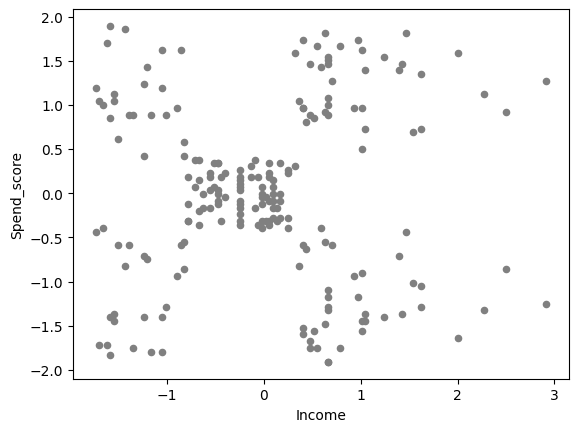

In [44]:
data_scaled.plot.scatter(x='Income', y='Spend_score', color='gray')
plt.show()

De la gráfica, hay 5 grupos naturales en los datos. Esto nos dice que necesitamos especificar 5 como el número de grupos para el algoritmo k-means.

3. Importe KMeans desde sklearn.cluster. Cree una instancia del modelo KMeans especificando 5 clústeres (n_clusters) y 42 para random_state:

In [45]:
# 42 es una elección arbitraria.
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=42)

El código anterior crea un instancia del modelo. Nota: Aún no se ha realizado ningún agrupamiento en los datos. 

n_clusters -> especifica el número de clústeres para crear (5). 

Se ha especificado un estado aleatorio que asegura que obtengamos los mismos resultados en ejecuciones repetidas ya que el algoritmo k-means no es determinista. 42 es una elección arbitraria.

4. Ajustar el modelo a los datos utilizando las columnas de cluster_cols. Utilizar el método de predicción del modelo de k-medias, asigne el clúster para cada cliente a la variable 'Cluster'.

In [46]:
model.fit(data_scaled[cluster_cols])
data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])
data_scaled.head(3)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income,Spend_score,Cluster
0,1,Male,-1.424569,15,39,-1.738999,-0.434801,2
1,2,Male,-1.281035,15,81,-1.738999,1.195704,3
2,3,Female,-1.352802,16,6,-1.700830,-1.715913,2


5. Para visualizar los puntos asignados a cada clúster,graficar cada grupo con un marcador usando el siguiente código. Se creará un subconjunto del conjunto de datos para cada grupo y utilizará un diccionario para especificar el marcador para el grupo:

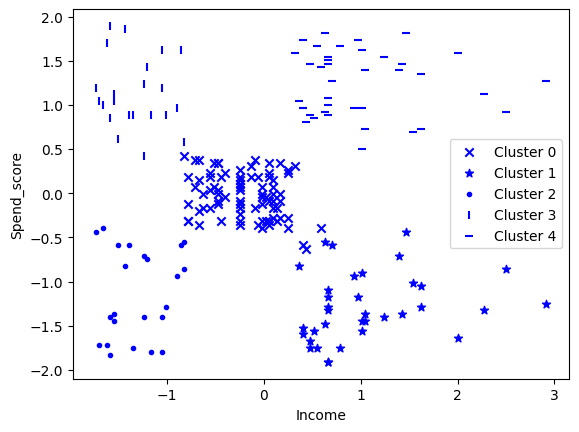

In [51]:
markers = ['x', '*', '.', '|', '_']
for clust in range(5):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(x = temp.Income, y = temp.Spend_score, marker = markers[clust], 
                color = 'blue', 
                label="Cluster " + str(clust))
plt.xlabel('Income')
plt.ylabel('Spend_score')
plt.legend()
plt.show()

Los clusterings, representados por las diferentes formas en el diagrama de dispersión, parecen estar alineados con los grupos naturales que identificamos visualmente en la Figura 3.18. El algoritmo k-means hizo un buen trabajo al identificar los grupos "naturales" en los datos.

En este ejercicio, ha realizado con éxito la agrupación en clusters de k-means utilizando el paquete scikit-learn. Pero el ejercicio de segmentación aún no ha terminado. Aún necesitará comprender estos clústeres y describirlos de una manera que la empresa los entienda.

# 3.3.1 Comprendiendo y describiendo los clústeres

Los analistas de marketing deben tener una comprensión clara de estos grupos para que puedan explicárselos a las distintas partes interesadas en el negocio. Como se mencionó anteriormente, las partes interesadas del negocio juegan un papel fundamental en el ejercicio de segmentación al revisar los **segmentos desde una perspectiva comercial**. Para comprender los clústeres, un enfoque sencillo consiste en estudiar las diversas **características de los clientes de cada clúster**. Para este propósito, no necesitamos restringirnos a las características que se incluyeron en el agrupamiento. De hecho, complementar el análisis con otras características relevantes nos ayuda a comprender mejor los segmentos de clientes y su comportamiento. La comprensión debe transmitirse al negocio. Además, dado que la empresa se referirá a los clústeres una y otra vez, debemos asegurarnos de etiquetar y describir mejor estos segmentos.

Entendamos los clusters obtenidos en el Ejercicio 3.05, Clustering de K-Means en Clientes de Centros Comerciales. 

Para comprender mejor las características de los clusters, analizaremos las características en la escala original y no las características estandarizadas. Para hacerlo, primero agreguemos la información del clúster al conjunto de datos data0 que preparamos en el Ejercicio 3.01. Recordemos que este es el conjunto de datos sin la estandarización aplicada e Income y Spend_Score están disponibles en sus escalas originales. 
Luego, veamos cómo varían los valores de Income y Spend_score entre los clústeres. Agruparemos el conjunto de datos por cluster y calcularemos y graficaremos el valor medio de estas variables.

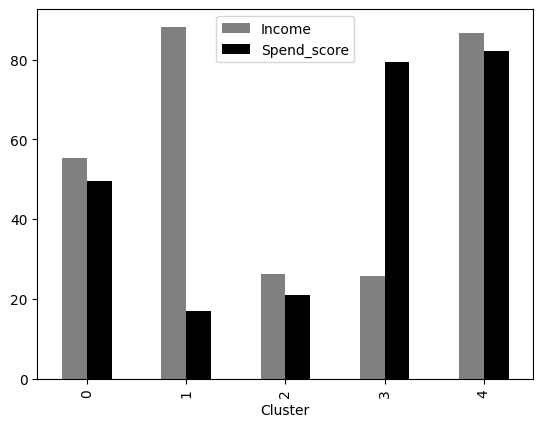

In [54]:
data0['Cluster'] = data_scaled.Cluster
data0.groupby('Cluster')[['Income', 'Spend_score']].mean().plot.bar(color=['gray','black']) 
plt.show()

La información aquí es en cierto modo un resumen de la gráfica en la Figura 3.20. Cada grupo se puede describir de la siguiente manera:
- Grupo 0: gastadores altos de bajos ingresos
- Grupo 1: gastadores moderados de ingresos moderados
- Grupo 2: gastadores de ingresos altos y bajos
- Grupo 3: gastadores de bajos ingresos
- Grupo 4: gastadores de altos ingresos

Además, puede asignar nombres creativos a estos grupos que capturen la esencia de su comportamiento. Ayuda a registrar y transmitir mejor la comprensión y es más fácil trabajar con él. 

Este paso es clave y completa el ejercicio de segmentación. 

Esta comprensión se presenta a los consumidores comerciales, quienes, a menudo tienen algunos comentarios que puede incorporar, lo que lleva a segmentos más refinados.

# Actividad 3.01: Segmentación de Clientes Bancarios para Campaña de Crédito
Los bancos a menudo tienen campañas de marketing para sus productos individuales. 
Therabank es un banco establecido que ofrece préstamos personales como producto. 
- La mayoría de los clientes de Therabank tienen depósitos, lo que es un pasivo para el banco y no es rentable. 
- Los préstamos si son rentables para el banco. 

Por lo tanto, conseguir que más clientes opten por un préstamo personal hace que la ecuación sea más rentable. 
**La tarea en cuestión es crear segmentos de clientes para maximizar la efectividad de su campaña de préstamos personales.**
El banco tiene datos de los clientes, incluidos datos demográficos, cierta información financiera y cómo respondieron estos clientes a una campaña anterior (Figura 3.21). 


- Experiencia: La experiencia laboral del cliente en años
- Ingresos: Los ingresos anuales estimados del cliente (miles de
Dólares estadounidenses)
- CCAvg: El gasto promedio en tarjetas de crédito por mes (miles de dólares estadounidenses)
- Hipoteca: El valor de la hipoteca de la casa del cliente (si la hubiere)
- Edad: La edad (en años) del cliente

El objetivo: crear segmentos de clientes para la campaña de marketing. 
También identificar cuál de estos segmentos tiene la mayor **propensión a responder a la campaña**, información que ayudará en gran medida a optimizar futuras campañas.

Hay que en cuenta que anque la respuesta de la campaña anterior está disponible, si se usa como un criterio para esta segmentación, no se podrá segmentar a otros clientes para los que nunca se ejecutó la campaña anterior, lo que limita severamente la cantidad de clientes a los que puede dirigirse. 

Por lo tanto, excluirá la característica (respuesta de campaña anterior) para la agrupación, pero puede usarla para evaluar cómo responderían sus grupos en general a la campaña.

1. Importamos las bibliotecas necesarias para el procesamiento, visualización y agrupación de datos.

In [55]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

2. Cargue los datos en un DataFrame e imprimimos las cinco filas superiores. Usando el método info() revise las columnas y sus tipos.

In [56]:
!curl https://raw.githubusercontent.com/limspiga/customer-analytics/main/week-2a/datasets/Bank_Personal_Loan_Modelling-1.csv -O
bank0 = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv") 
bank0.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  202k  100  202k    0     0   635k      0 --:--:-- --:--:-- --:--:--  633k


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


3. Crear las escalas estándar (standard scaling) en las columnas `Income` y `CCAvg` para crear nuevas columnas `Income_scaled` y `CCAvg_scaled`. Usar estas dos variables para la segmentación de clientes. 

In [ ]:
 bank0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [66]:
# fix
scaler = StandardScaler() # crea objeto 
bank0[['Income_scaled', 'CCAvg_scaled']] = scaler.fit_transform( bank0[['Income','CCAvg']])

# resultado con un describe
bank0[['Income_scaled', 'CCAvg_scaled']].describe().round()

,Income_scaled,CCAvg_scaled
count,5000.0,5000.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.0,-1.0
25%,-1.0,-1.0
50%,-0.0,-0.0
75%,1.0,0.0
max,3.0,5.0



4. Agrupar en clústeres de k-means, especificando 3 clústeres utilizando `Income` y `CCAvg` como características. Especifique `random_state = 42` (una elección arbitraria) para garantizar la coherencia de los resultados. Cree una nueva columna, `Cluster`, que contenga el clúster pronosticado del modelo.

In [67]:
model = KMeans(n_clusters=3, random_state=42)
cluster_cols = ['Income_scaled', 'CCAvg_scaled']
model.fit(bank0[cluster_cols])
bank0['Cluster'] = model.predict(bank0[cluster_cols])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5. Visualizar los grupos utilizando diferentes marcadores para los grupos en un diagrama de dispersión entre `Income` y `CCAvg`. La salida debe ser la siguiente:

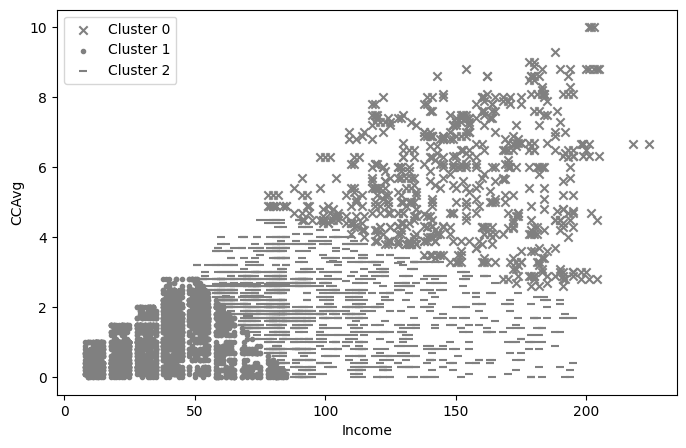

In [79]:
markers = ['x', '.', '_']
plt.figure(figsize=[8,5])
for clust in range(3):
    temp = bank0[bank0.Cluster == clust]
    plt.scatter(temp.Income, temp.CCAvg, 
                marker=markers[clust], 
                color='gray', 
                label="Cluster "+str(clust) )
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.legend()
plt.show()

6. Para comprender los grupos, imprima los valores promedio de Ingreso y CCAvg para los tres grupos.

In [80]:
bank0.groupby('Cluster')[['Income', 'CCAvg']].mean().round(2) # centroides
# Puede ver que tanto los Incomes como CCAvg varían significativamente según los grupos.

,Income,CCAvg
Cluster,,
0,150.39,5.54
1,39.14,0.98
2,96.14,2.03


7. Realice una comparación visual de los clusters usando los valores estandarizados para `Income` y `CCAvg`:


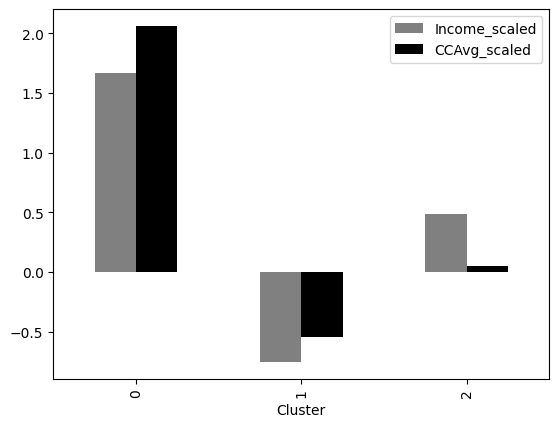

In [81]:
bank0.groupby('Cluster')[['Income_scaled', 'CCAvg_scaled']].mean().plot.bar(color=['gray','black'])
plt.show()

En la figura anterior se puede ver los valores promedio de las características 
contra cada grupo en una escala "estandarizada". 

- El grupo 0 está más cerca del promedio (0 en la escala estándar) tanto para Income como para CCAvg. 

- El grupo 2 es mucho más alto en estas dos variables.

- Mientras que el grupo 1 tiene valores inferiores al promedio para ambas variables.

8. Para comprender mejor los grupos utilizando otras funciones relevantes, imprima los valores promedio contra los grupos para las funciones Age, Mortgage, Family, CreditCard, Online y Personal Loan. Compruebe qué cluster tiene la mayor propensión a tomar un préstamo personal.

In [84]:
sel_cols = ['Income', 'CCAvg', 'Age', 'Mortgage', 'Family', 'CreditCard', 'Online', 'Personal Loan']
bank0.groupby('Cluster')[sel_cols].mean().round(2)

,Income,CCAvg,Age,Mortgage,Family,CreditCard,Online,Personal Loan
Cluster,,,,,,,,
0,150.39,5.54,43.92,89.54,2.02,0.29,0.61,0.41
1,39.14,0.98,45.80,42.23,2.51,0.29,0.59,0.00
2,96.14,2.03,45.18,65.19,2.36,0.30,0.60,0.12


Los grupos tienen tendencias muy diferentes para aceptar un préstamo personal (Personal Loan). 

- El grupo 2 tiene el más alto con diferencia, alrededor del 42 % 
- <ientras que el grupo 1 tiene 0 posibilidades de obtener un préstamo. 

Se puede ver que los grupos descubiertos aquí se correlacionan bien y pueden usarse para campañas de marketing en torno a préstamos personales.



9. Basándose en su comprensión de los grupos, asigne etiquetas descriptivas a los grupos.

Las características diferenciadoras clave para los grupos son Income, CCAvg e Mortgage.
Algunas etiquetas básicas para estos grupos podrían ser las siguientes: 

- Grupo 0: Joes?? promedio (ingreso medio, gasto medio).
- Grupo 1: Bajo potencial de gasto (ingreso bajo, gasto bajo).
- Grupo 2: Grandes apostadores (ingreso alto, gasto alto).

En actividad realizamos todos los pasos clave para desarrollar un ejercicio de segmentación completo. 

Se crearon clústeres útiles y se obtuvo información valiosa para el negocio. Hasta ahora, en los ejercicios y la actividad, utilizó como máximo dos variables (o dimensiones) para la agrupación. Si bien eso fue conveniente, muchos escenarios comerciales requerirán que usted trate con numerosos atributos de los clientes, por lo que tendrá que lidiar con datos de gran dimensión.
Vamos a entender las consideraciones y el proceso a continuación.

# 3.4 Clustering con High-Dimensional Data
Es común tener conjuntos de datos que tengan más de dos dimensiones. 

En el conjunto de datos de clientes del centro comercial de los ejercicios anteriores, tenemos:

- Edad del cliente 
- puntuación de ingresos 
- gastos

Anteriormente, solo usábamos spending scores y income para realizar la segmentación. El age podría ser una característica interesante ya que podemos tener diferencias en el comportamiento y la capacidad de respuesta a las campañas de marketing para clientes en diferentes grupos de edad. Además, aparte de los datos demográficos habituales, si tuviéramos alguna información sobre cómo respondieron estos clientes a las ventas anunciadas, cuántas compras han realizado de nuestros productos o cuántas personas viven en su hogar, podríamos tener muchas más dimensiones.

La agrupación de entidades representadas en dimensiones superiores no es diferente de la agrupación con dos dimensiones. El paso clave es el cálculo de similitud/distancia. Recuerde que la medida de distancia que empleamos, la distancia euclidiana, se definió de la siguiente manera:

<h1><center>
$ d\left( p,q\right)   = \sqrt {\sum  \left( p_{i}-q_{i}\right)^2 } $


Figura 3.24: Ecuación para calcular la distancia euclidiana entre dos puntos
</center><h1>



Aquí, $p = (p1+p2+...pn)$, $q = (q1+q2+...qn)$, mientras que n es el número de características. La distancia euclidiana puede manejar muy bien múltiples dimensiones. Una vez que se define la distancia, se pueden emplear los algoritmos habituales de ML para la agrupación, por ejemplo, k-means.

Sin embargo, lo que sí cambia es cómo visualizamos los grupos. En el Ejercicio 3.05, Agrupación de K-Means en Clientes de Centros Comerciales, solo teníamos dos variables y podíamos visualizar fácilmente los puntos de datos y las agrupaciones formadas. Sin embargo, con datos de mayor dimensión, primero debemos reducir los datos a dos dimensiones.

Las técnicas de reducción de dimensionalidad se emplean comúnmente para esto. La idea de la reducción de la dimensionalidad es que los datos multidimensionales se reducen, generalmente a dos dimensiones, con fines de visualización, de una manera que preserva la distancia entre los puntos. Una forma simple e intuitiva de entender la reducción de la dimensionalidad es considerar que las imágenes y videos que vemos en pantallas bidimensionales son, de hecho, representaciones de un mundo tridimensional, reducido a dos dimensiones para que puedan visualizarse en la pantalla bidimensional. . Mientras
perdemos una dimensión (profundidad) en las imágenes, la pérdida es mínima y no arruinar la experiencia visual. La reducción de dimensionalidad, cuando se aplica a nuestro conjunto de datos multidimensional, condensaría la mayor parte de la información en dos dimensiones para permitir la visualización.

Las técnicas para la reducción de la dimensionalidad son muchas. La más común es el Análisis de componentes principales (PCA). PCA es un método de transformación de datos. Toma las características/dimensiones originales y crea nuevas características/dimensiones que capturan la mayor variación en los datos. En otras palabras, crea dimensiones que contienen la mayor cantidad de información sobre los datos, de modo que cuando toma los dos primeros componentes principales (PC), es decir, las dimensiones, se queda con la mayor parte de la información sobre los datos, pero reducido a solo dos dimensiones:


<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1pLdgI7PbEFqDKewhao2JgqAZC4lmMOMQ' width="800" />
<figcaption>Figure 3.25: How PCA works</figcaption></center>
</figure>

Para la implementación de Python se usa el módulo PCA del paquete scikit-learn. 
El módulo PCA tiene métodos de ajuste y transformación. Ajustar significaría calcular las PC a partir de los datos y transformar significaría representar los datos en estas nuevas PCA. El método fit_transform combina los dos métodos. 

    # from sklearn import decomposition
    # pca = decomposition.PCA(n_components=N) 
    # pca_res = pca.fit_transform(data[cols])  # transform

Aquí, `N` es el número de PCA para calcular, `cols` es una lista de columnas para calcular los PCA y la data son el conjunto de datos que contiene estas columnas. `pca_res` se asignará los datos transformados. 

Cuando se realiza el agrupamiento con datos de alta dimensión, el enfoque de formación de grupos sigue siendo el mismo. 

Es solo la visualización la que ahora necesita un paso adicional: la reducción a dos dimensiones utilizando una técnica de reducción de dimensionalidad como PCA. 

# Ejercicio 3.06: Manejo de datos de alta dimensión
En este ejercicio, agruparemos en clústeres el conjunto de datos de clientes del centro comercial utilizando el score de Age, Income, Spend_score. 

El objetivo es encontrar grupos naturales en los datos basados ​​en estos tres criterios y analizar los segmentos de clientes para identificar sus características diferenciadoras. 

Esta vez, sin embargo, la visualización no será fácil. Deberá usar PCA para reducir los datos a dos dimensiones para visualizar los clústeres.

1. Cree una lista, `cluster_cols`, que contenga las columnas `Age`, `Income` y `Spend_score`, que se usaran para la agrupación.


In [85]:
cluster_cols = ['Age', 'Income', 'Spend_score']
data_scaled[cluster_cols].head(3).round(2)

,Age,Income,Spend_score
0,-1.42,-1.74,-0.43
1,-1.28,-1.74,1.20
2,-1.35,-1.70,-1.72


2. Agrupar en clústeres de k-means, especificando 4 clústeres utilizando las características escaladas. Especifique `random_state = 42`.

Asigne los Clusters a la columna `Cluster`:

In [87]:
cluster_cols = ['Age', 'Income', 'Spend_score']
data_scaled[cluster_cols].head(3)
model = KMeans(n_clusters=4, random_state=42)
model.fit(data_scaled[cluster_cols])
data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])
data_scaled['Cluster']

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0      2
1      2
2      2
3      2
4      2
      ..
195    1
196    0
197    1
198    0
199    1
Name: Cluster, Length: 200, dtype: int32

3. Usando PCA en las columnas escaladas, cree dos columnas nuevas, pc1 y pc2, que contengan los datos para PC1 y PC2 respectivamente:

In [92]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2) # n_components=2
pca_res = pca.fit_transform(data_scaled[cluster_cols])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

4. Visualice los clusters usando diferentes scores y colores para los clusters en un diagrama de dispersión entre pc1 y pc2.

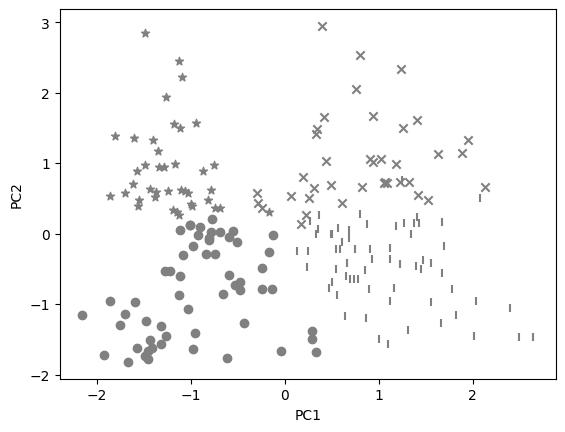

In [93]:
markers = ['x', '*', 'o','|']
for clust in range(4):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, marker=markers[clust], label="Cluster "+str(clust), color='gray') 
    plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Nota: Las formas y los colores de los segmentos que obtiene pueden variar ligeramente de
# la figura anterior. Esto se debe a cierta aleatoriedad adicional en
# el proceso, introducido por la inicialización aleatoria del centro del grupo que es
# realizado por el algoritmo k-means. Desafortunadamente, la aleatoriedad permanece.
# incluso después de configurar la semilla aleatoria y no podemos controlarla. Sin embargo,
# si bien las formas asignadas pueden diferir, debe obtener grupos con el
# mismas características.

Debe aparecer el siguiente gráfico:

Figura 3.27: Un gráfico de los datos reducidos a dos dimensiones que denotan los tres conglomerados

Tenga en cuenta que los ejes $x$ e $y$ aquí son las PCA y, por lo tanto, no son fáciles de interpretar (ya que son combinaciones derivadas de las características originales). Sin embargo, al visualizar los grupos, podemos tener una idea de qué tan buenos son los grupos en función de cuánto se superponen.

5. Para comprender los grupos, imprima los valores promedio de las características originales utilizadas para agrupar contra los cuatro grupos:

In [94]:
data0['Cluster'] = data_scaled.Cluster
data0.groupby('Cluster')[['Age', 'Income', 'Spend_score']].mean()

,Age,Income,Spend_score
Cluster,,,
0,39.368421,86.500000,19.578947
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,53.984615,47.707692,39.969231


En la tabla anterior, puede ver que el puntaje de gasto varía significativamente entre los clústeres. Esto es cierto tanto para la Age como para los Income.
6. A continuación, visualice esta información mediante diagramas de barras. Verifique qué características son las más diferenciadas para los clústeres utilizando el siguiente código:

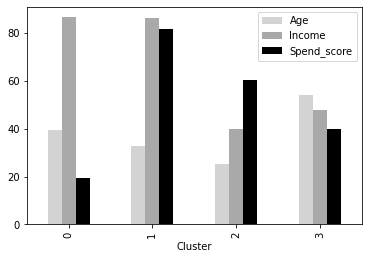

In [ ]:
data0.groupby('Cluster')[['Age', 'Income', \
                          'Spend_score']].mean() \
     .plot.bar(color=['lightgray', 'darkgray', 'black'])
plt.show()

Figura 3.29: Diagrama de barras para verificar las características que son las más diferenciadas para los clsterings

Puede ver que las tres columnas varían significativamente entre los clústeres. 
- Tiene el clúster 0 con el ingreso promedio más alto pero el puntaje de gasto y la edad promedio más bajos. 
- Tiene el clúster 1, que es promedio en edad, alto en ingresos y el más alto en gastos. 

Vamos a describirlos mejor en el siguiente paso.

7. Basándose en su comprensión de los grupos, asigne etiquetas descriptivas a los grupos.
Una forma de describir los grupos es la siguiente:


- Grupo 0: tacaños de mediana edad (ingresos altos, gasto bajo) 
- Grupo 1: grandes apostadores jóvenes (edad más joven, ingresos altos, gasto alto) 
- Grupo 2: aspirantes jóvenes (ingresos bajos, gasto alto)
- Grupo 3: Viejos Joes promedio (ingreso promedio, gasto promedio)

En este ejercicio, ha utilizado con éxito PCA para la reducción de la dimensionalidad y la visualización de los clústeres. Con la ayuda de PCA, vio que los clústeres
están bien separados. También analizó los grupos y les dio descripciones que las empresas pueden entender e interpretar.

Con esto hemos recorrido todos los pasos que se emplean en un ejercicio de segmentación de clientes. Es importante darse cuenta y recordar que la "agrupación", la agrupación real de los clientes, es parte del ejercicio general. La estandarización de las variables, la elección de los criterios correctos para la segmentación y la construcción de una buena comprensión de los grupos son todos pasos críticos. Sin mencionar la importancia de las partes interesadas del negocio para obtener los segmentos de clientes más procesables.

# Actividad 3.02: Segmentación de clientes bancarios con múltiples Funcionalidades

En esta actividad, se revisará el problema de Therabank. Se deberá crear segmentos de clientes para maximizar la eficacia de su campaña de **préstamos personales**. Lo logrará encontrando los tipos de clientes naturales en los datos y descubriendo las características que los diferencian. Luego se identificará los segmentos de clientes que tienen la mayor propensión a tomar un préstamo.

En la Actividad 3.01, Segmentación de clientes bancarios para campañas de préstamos, empleó solo dos características del cliente. En esta actividad, empleará funciones adicionales, a saber el: Income, CCAvg, Age y la Experience Mortgage. Como se trata de datos multidimencionales se usara PCA para visualizar los clústeres. 

Debe entender los segmentos de clientes obtenidos y les proporcionará etiquetas comerciales. Como parte de su evaluación y comprensión de los segmentos, también verificará las tasas de respuesta históricas de los segmentos obtenidos.

1. Crear una copia del conjunto de datos denominado `bank_scaled` y realizar un escalado estándar de las columnas `Income`, `CCAvg`, `Age`, `Experience` y `Mortgage`.


In [95]:
bank_scaled = bank0.copy()
cluster_cols = ['Income', 'CCAvg', 'Age', 'Experience', 'Mortgage']
bank_scaled[cluster_cols] = scaler.fit_transform(bank_scaled[cluster_cols])


2. Descrinit las columnas procesadas para verificar que la escala se ha aplicado correctamente.


In [ ]:
 bank_scaled[cluster_cols].describe().round(2)


# Los valores medios son todos prácticamente 0 y la desviación estándar es 1, 
# lo que confirma que la estandarización se realizó correctamente.

,Income,CCAvg,Age,Experience,Mortgage
count,5000.00,5000.00,5000.00,5000.00,5000.00
mean,0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.43,-1.11,-1.95,-2.01,-0.56
25%,-0.76,-0.71,-0.90,-0.88,-0.56
50%,-0.21,-0.25,-0.03,-0.01,-0.56
75%,0.53,0.32,0.84,0.86,0.44
max,3.26,4.61,1.89,2.00,5.69



3. Realice la agrupación en clústeres de k-means, especificando 3 clústeres utilizando las características escaladas. Especifique estado_aleatorio como 42.


In [96]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(bank_scaled[cluster_cols])
bank_scaled['Cluster'] = model.predict(bank_scaled[cluster_cols])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



4. Usando PCA en las columnas escaladas, cree dos columnas nuevas, pc1 y pc2, que contengan los datos para PC1 y PC2 respectivamente.


In [97]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(bank_scaled[cluster_cols])
bank_scaled['pc1'] = pca_res[:,0]
bank_scaled['pc2'] = pca_res[:,1]

5. Visualice los clusters usando diferentes marcadores para los clusters en un diagrama de dispersión entre pc1 y pc2. El gráfico debe aparecer como en la siguiente figura:

    Figura 3.30: Gráfico de los datos reducidos a dos dimensiones que denotan los tres conglomerados


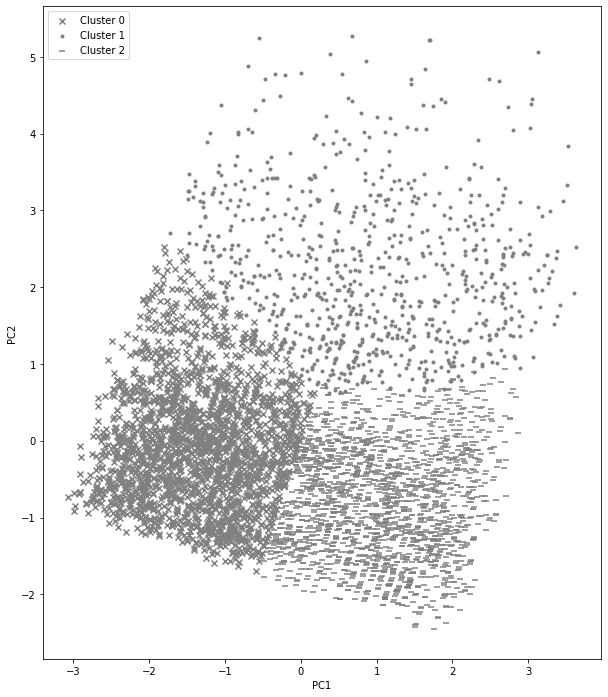

In [ ]:
markers = ['x', '.', '_'] 
plt.figure(figsize=[10,12]) 
for clust in range(3):
    temp = bank_scaled[bank_scaled.Cluster == clust] 
    plt.scatter(temp.pc1, temp.pc2, marker=markers[clust], 
                label="Cluster "+str(clust), 
                color='gray')
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


# En la figura anterior, podemos ver los tres clústeres que identificó el algoritmo.
# Podemos ver que, los grupos no están muy claramente separados de forma natural,
# como es el caso en muchas situaciones del mundo real.




6. Para comprender los clusters, imprima los valores promedio de las características utilizadas para agrupar contra los tres clusters. Compruebe **qué** características son las más diferenciadas para los clústeres.

In [98]:
bank0['Cluster'] = bank_scaled.Cluster
bank0.groupby('Cluster')[cluster_cols].mean()

# Vemos que solo la Age y la Experience son diferentes en los "tres grupos".
# Todas las demás características tienen valores similares para dos de los tres grupos.

,Income,CCAvg,Age,Experience,Mortgage
Cluster,,,,,
0,58.941774,1.367514,55.536044,30.233826,45.134935
1,147.650185,4.856403,43.672435,18.644005,116.279357
2,60.124322,1.382121,35.116428,9.873705,44.771584


7. Para comprender mejor los grupos utilizando otras funciones relevantes, imprima los valores promedio contra los grupos para las funciones Edad, Hipoteca, Familia, Tarjeta de crédito, En línea y Préstamo personal y verifique qué grupo tiene la mayor propensión a tomar un préstamo personal.


In [100]:
sel_cols = ['Income', 'CCAvg', 'Age', 'Experience', \
            'Mortgage', 'Family', 'CreditCard', 'Online', \
            'Personal Loan']
bank0.groupby('Cluster')[sel_cols].mean()

,Income,CCAvg,Age,Experience,Mortgage,Family,CreditCard,Online,Personal Loan
Cluster,,,,,,,,,
0,58.941774,1.367514,55.536044,30.233826,45.134935,2.397874,0.300370,0.604898,0.039741
1,147.650185,4.856403,43.672435,18.644005,116.279357,2.002472,0.299135,0.613103,0.398022
2,60.124322,1.382121,35.116428,9.873705,44.771584,2.552047,0.285150,0.581648,0.035520


Podemos ver claramente que el Cluster 1 tiene la mayor propensión a tomar un **Personal Loan**.

Los grupos 0 y 2 tienen una propensión muy similar.

Parece que hemos identificado un segmento de alto potencial.

8. Basándose en su comprensión de los grupos, asigne etiquetas descriptivas a los grupos.

- Grupo 0: gastadores de mediana edad (altos ingresos, alto gasto)
- Grupo 1: veteranos de bajo gasto (gasto bajo, edad alta, ingreso promedio)
- Grupo 2: Jóvenes que gastan poco (gasto bajo, edad baja, ingreso promedio)